### 

###
$$
    \bf{\Large\text{Постановка задачи}\normalsize}
$$


На подвижной поверхности находится n-ное количество метрономов. Необходимо определить частоту синхронизации, фазу синхронизации, также построить графики зависимостей $ \omega(t), \varphi(t) $

В данной системе за основы мы возьмем модель Курамото, которая описывает синхронизацию систем:

$$
\frac{d\varphi_i}{dt} = \omega_i + \sum_{j = 0}^{n} K_{ij}\sin{(\varphi_j-\varphi_i)}
$$

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from tqdm import tqdm
import solver2 as solver
from PIL import Image
from PIL import ImageDraw

In [50]:
ImageResolution = (512,512)
ImageColorSpace = "RGB"

r = 1
Colors = [
'green',
'red',
'blue',
'black',
'yellow',
'orange',
'purple'
]

resolution = 10**(-2)
duration = 5e0
omegas = [20.0,20.0,20.0,20.0,20.0,20.0,20.0]
phis = [np.pi,np.pi*0.75,np.pi*0.5,np.pi*0.25, np.pi*0, np.pi*1.25, np.pi*1.5]
# k_arr = [[-1.0,-1.0],
#          [-1.0,-1.0]]
k_arr = [[-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0],
         [-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0],
         [-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0],
         [-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0],
         [-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0],
         [-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0],
         [-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0]]

In [51]:
TimeAxis, Phi_Axis, Omega_Axis = solver.Integrator(resolution, duration, omegas, phis, k_arr)

In [52]:
n = len(Phi_Axis[0])

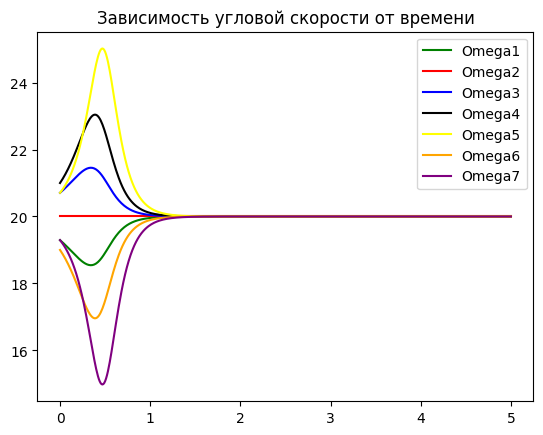

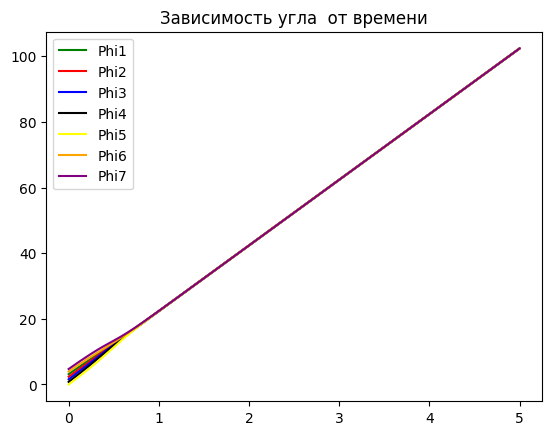

In [53]:

for i,OM in enumerate(Omega_Axis):
    plt.plot(TimeAxis,OM, color = Colors[i], label = str("Omega" + str(i+1)))
plt.title("Зависимость угловой скорости от времени")
plt.legend()
plt.savefig('Omegas.pdf')
plt.show()
#Phi_Axis = np.sin(Phi_Axis)
#TimeAxis = np.sin(TimeAxis)
for i,OM in enumerate(Phi_Axis):
    plt.plot(TimeAxis,OM, color = Colors[i], label = str("Phi" + str(i+1)))
plt.title("Зависимость угла  от времени")
plt.legend()
plt.savefig('Phis.pdf')
plt.show()

In [54]:

My_Image = Image.new(ImageColorSpace, ImageResolution)

[(0.5019607843137255, 0.0, 0.5019607843137255, 1.0), (0.4310957324106113, 0.07086505190311418, 0.4310957324106113, 1.0), (0.3582622068435217, 0.14369857747020376, 0.3582622068435217, 1.0), (0.2873971549404075, 0.21456362937331794, 0.2873971549404075, 1.0), (0.21456362937331797, 0.2873971549404075, 0.21456362937331797, 1.0), (0.14369857747020376, 0.3582622068435217, 0.14369857747020376, 1.0), (0.0708650519031142, 0.4310957324106113, 0.0708650519031142, 1.0)]


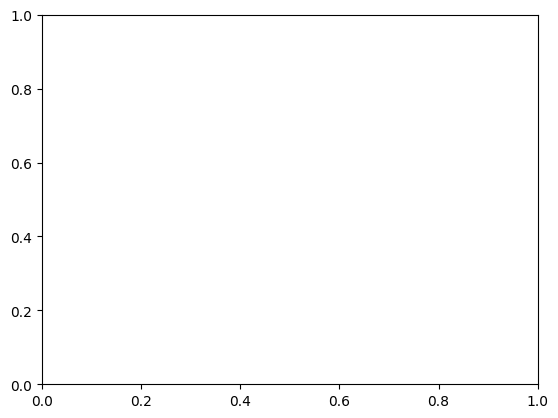

In [55]:
from matplotlib.colors import LinearSegmentedColormap
COLORS = ['purple', 'green']
cmap = LinearSegmentedColormap.from_list('custom', COLORS)
Colors = [cmap(i/len(Phi_Axis)) for i in range(len(Phi_Axis))]
print(Colors)
figure, axes = plt.subplots()

def frame (i):
    axes.clear()

    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_xlim(-r * 10.1, r*10.1)
    axes.set_ylim(-r * 2.0, r*2.0)
    axes.set_aspect(1)
    axes.plot((-10.1,10.1),(0.5,0.5), color = 'black')
     
    for j, phi in enumerate(Phi_Axis[1:]):
        x = np.sin(phi[i]) + j*2 -5
        y = 0.5*np.ones_like(x)
        axes.plot(x, y, marker = 'o', color = Colors[j], markersize = 15, zorder = 10)


In [56]:
frames_numbers = np.arange(n)
anime = FuncAnimation(figure, frame, frames = tqdm(frames_numbers[::2]), interval  = 20 )
anime.save('Metronomes2.gif') 
display(anime)

 98%|█████████▊| 244/250 [00:04<00:00, 50.15it/s]

 98%|█████████▊| 244/250 [00:22<00:00, 50.15it/s]